# College Major and Salary

The data behind the story [The Economic Guide To Picking A College Major](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

[Raw data](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv)

All data is from American Community Survey 2010-2012 Public Use Microdata Series.

Original data and more: http://www.census.gov/programs-surveys/acs/data/pums.html

Documentation here: http://www.census.gov/programs-surveys/acs/technical-documentation/pums.html

## Data Dictionary

Header | Description
---|---------
`Rank` | Rank by median earnings
`Major_code` | Major code, FO1DP in ACS PUMS
`Major` | Major description
`Major_category` | Category of major from Carnevale et al
`Total` | Total number of people with major
`Sample_size` | Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
`Men` | Male graduates
`Women` | Female graduates
`ShareWomen` | Women as share of total
`Employed` | Number employed (ESR == 1 or 2)
`Full_time` | Employed 35 hours or more
`Part_time` | Employed less than 35 hours
`Full_time_year_round` | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
`Unemployed` | Number unemployed (ESR == 3)
`Unemployment_rate` | Unemployed / (Unemployed + Employed)
`Median` | Median earnings of full-time, year-round workers
`P25th` | 25th percentile of earnigns
`P75th` | 75th percentile of earnings
`College_jobs` | Number with job requiring a college degree
`Non_college_jobs` | Number with job not requiring a college degree
`Low_wage_jobs` | Number in low-wage service jobs

## David Robinson Video 

In [2]:
%%HTML
<iframe width="900" height="531" src="https://www.youtube.com/embed/nx5yhXAQLxw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [15]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set('notebook', 'white', rc={'figure.figsize': (12, 6.5)})

%config InlineBackend.figure_formats = ['retina']

## Load the Data

First things first, let's load the data and just take a look at the first few rows.

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## College Major(s) with Lowest Unemployment Rates

In [6]:
df.loc[df.Unemployment_rate == df.Unemployment_rate.min()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.0,42000,30000,78000,452,67,25
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.0,37000,26000,40000,677,184,56
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.0,35000,18500,44000,355,144,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.0,34000,29000,35000,346,206,111


## College Major(s) with Highest Unemployment Rate

In [7]:
df.loc[df.Unemployment_rate == df.Unemployment_rate.max()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244


## Distribution of Median Salaries Across College Majors

### Seaborn

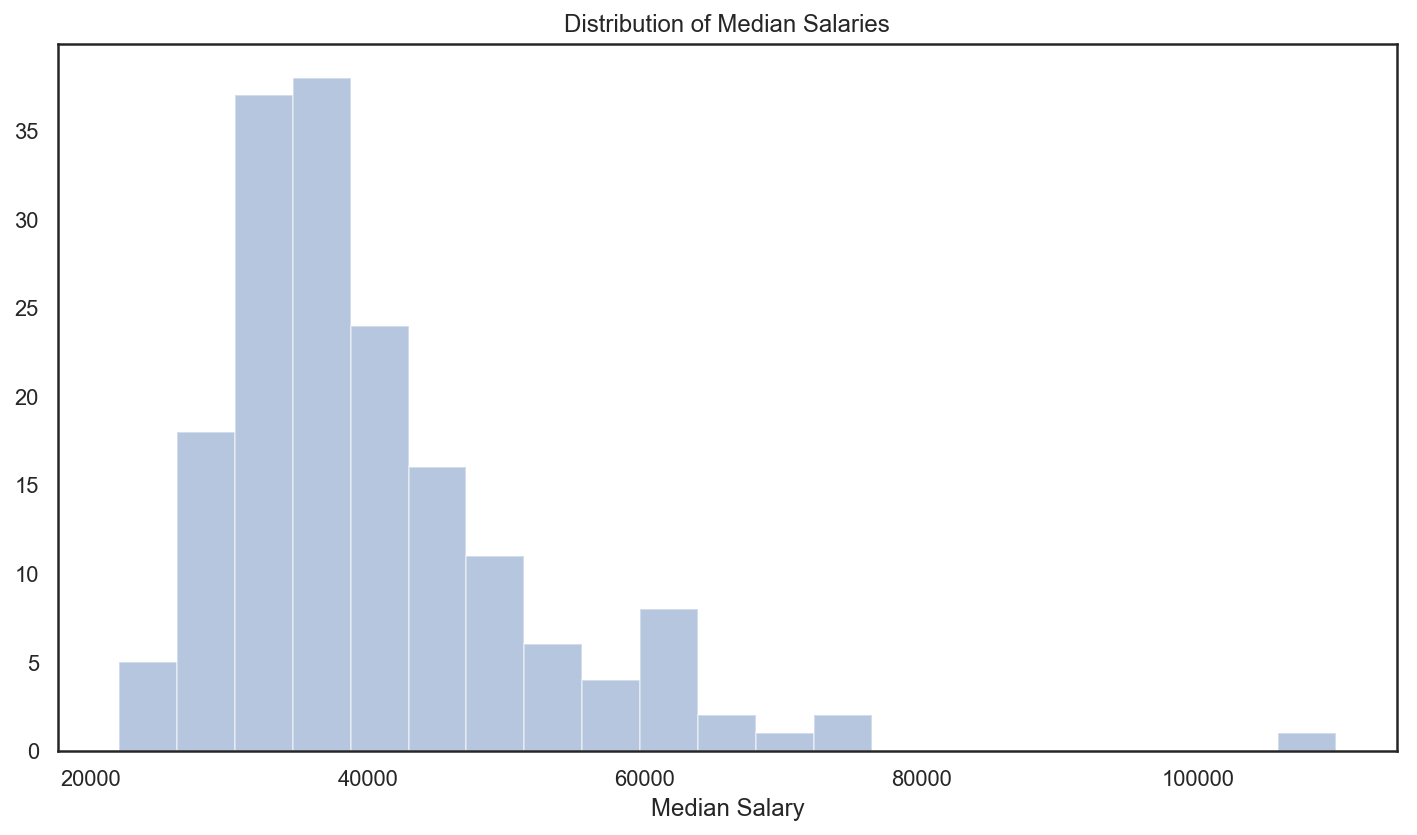

In [23]:
ax = sns.distplot(df['Median'], kde=False)
ax.set_title("Distribution of Median Salaries")
ax.set_xlabel('Median Salary');

### Matplotlib and Pandas

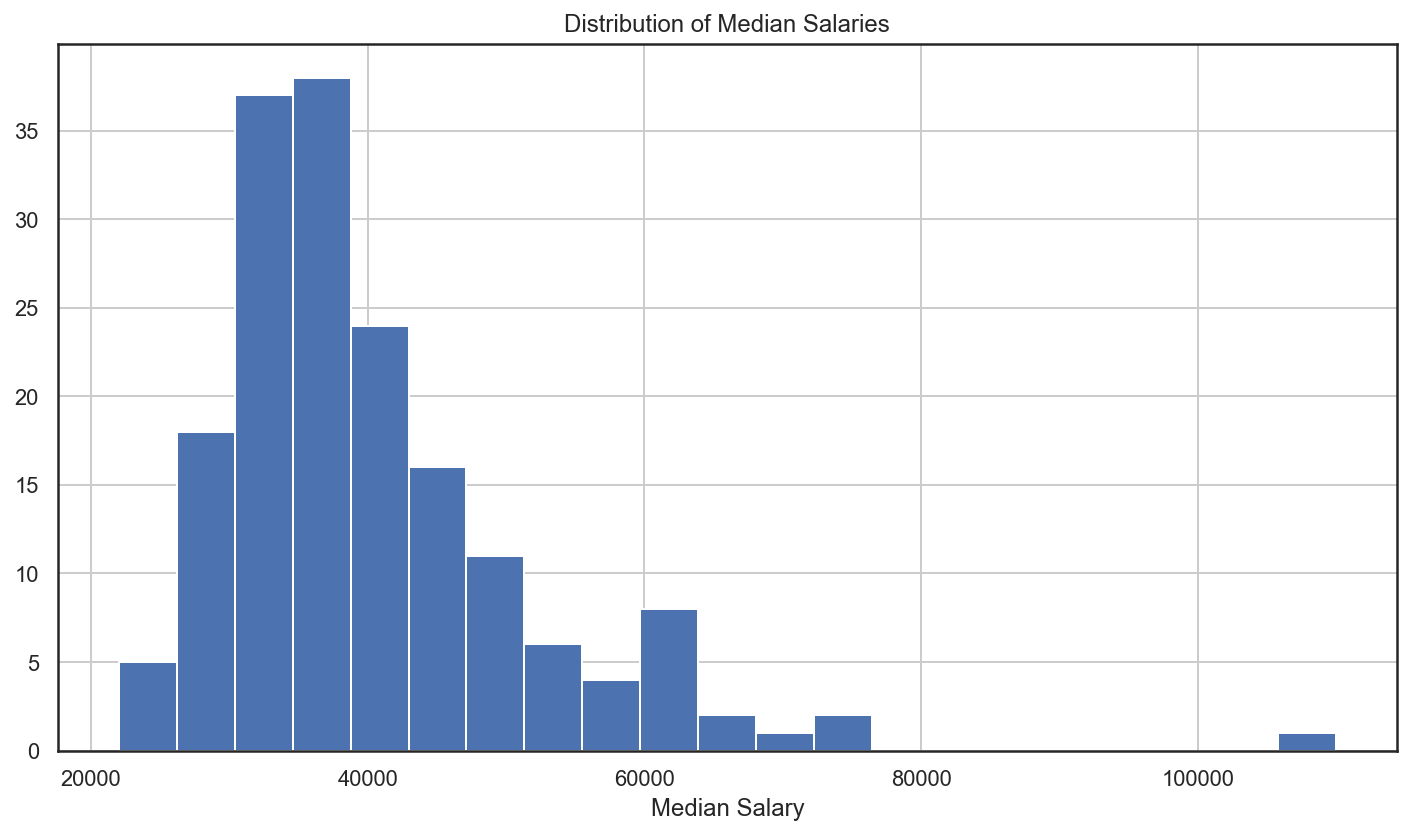

In [29]:
ax = df['Median'].hist(bins=21)
ax.set_title("Distribution of Median Salaries")
ax.set_xlabel("Median Salary");

## Distribution of Median Salaries by Major

### Seaborn

By default, the Seaborn plot is pretty close to David's, as it orders the boxes by, what appears to be, the maximum value. However, it's not exactly the same since David is ordering by the median of the Median salaries. 

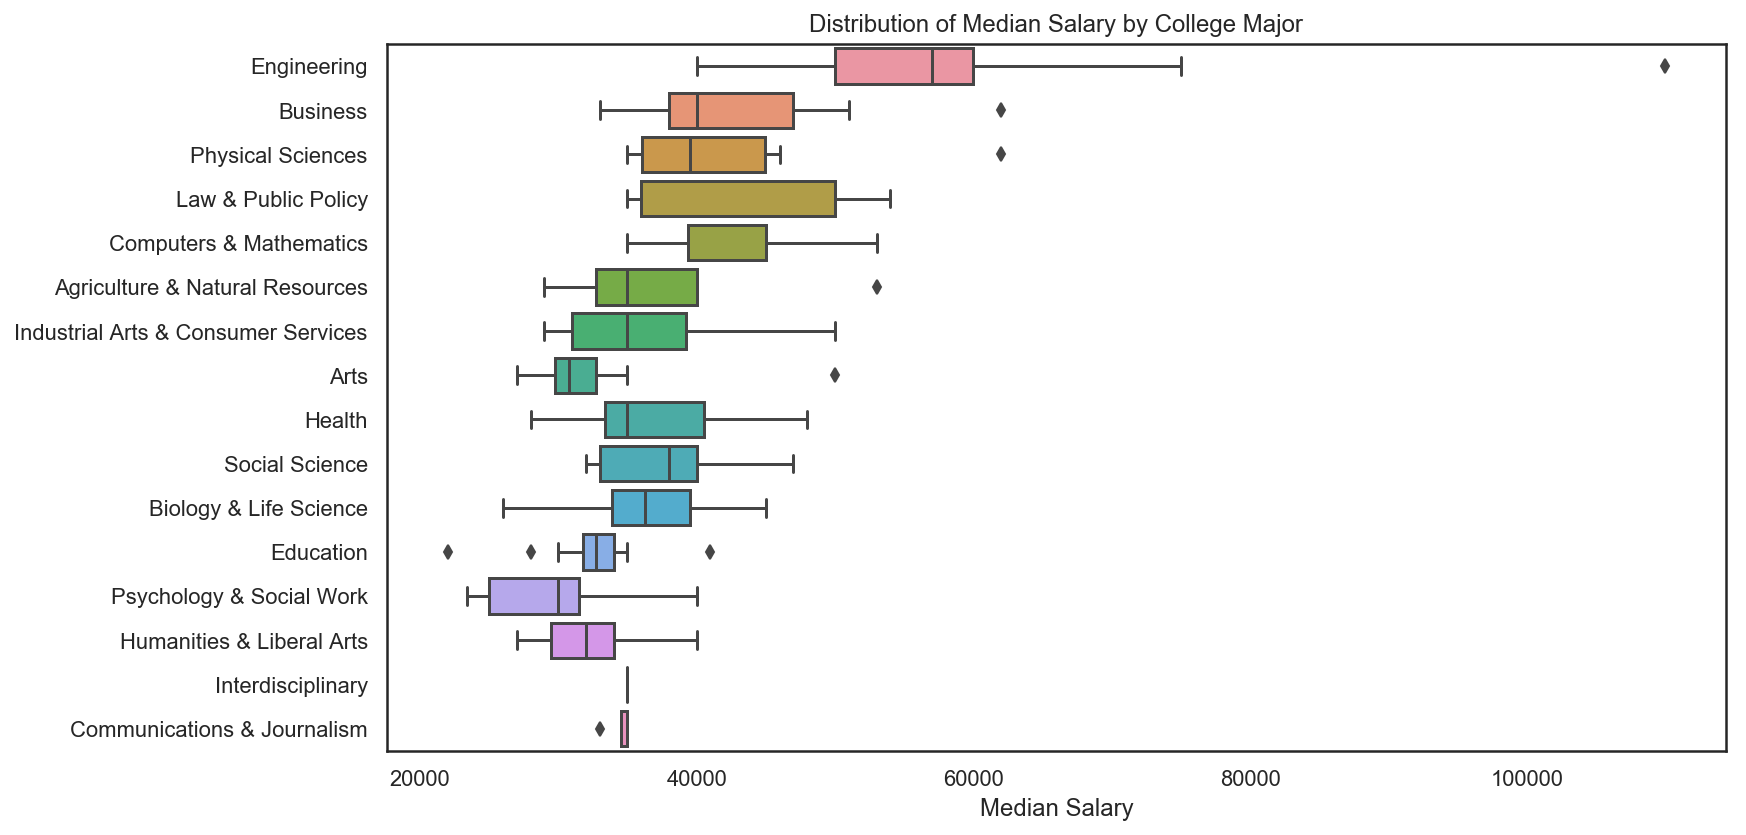

In [37]:
ax = sns.boxplot(x='Median', y='Major_category', data=df)
ax.set_title("Distribution of Median Salary by College Major")
ax.set_xlabel("Median Salary")
ax.set_ylabel("");

To get the exact same ordering that David does, we'll first need to find the median of each major category by doing a group by `'Major_category'`, then calculating the median value on the `'Median'` column, and finally sorting the results. The index of a grouped dataframe is the column on which we did the grouping, so we can simply get that index to get the list of major categories in the correct order. Finally, we pass that list into the Seaborn `boxplot` method via the `order` parameter.

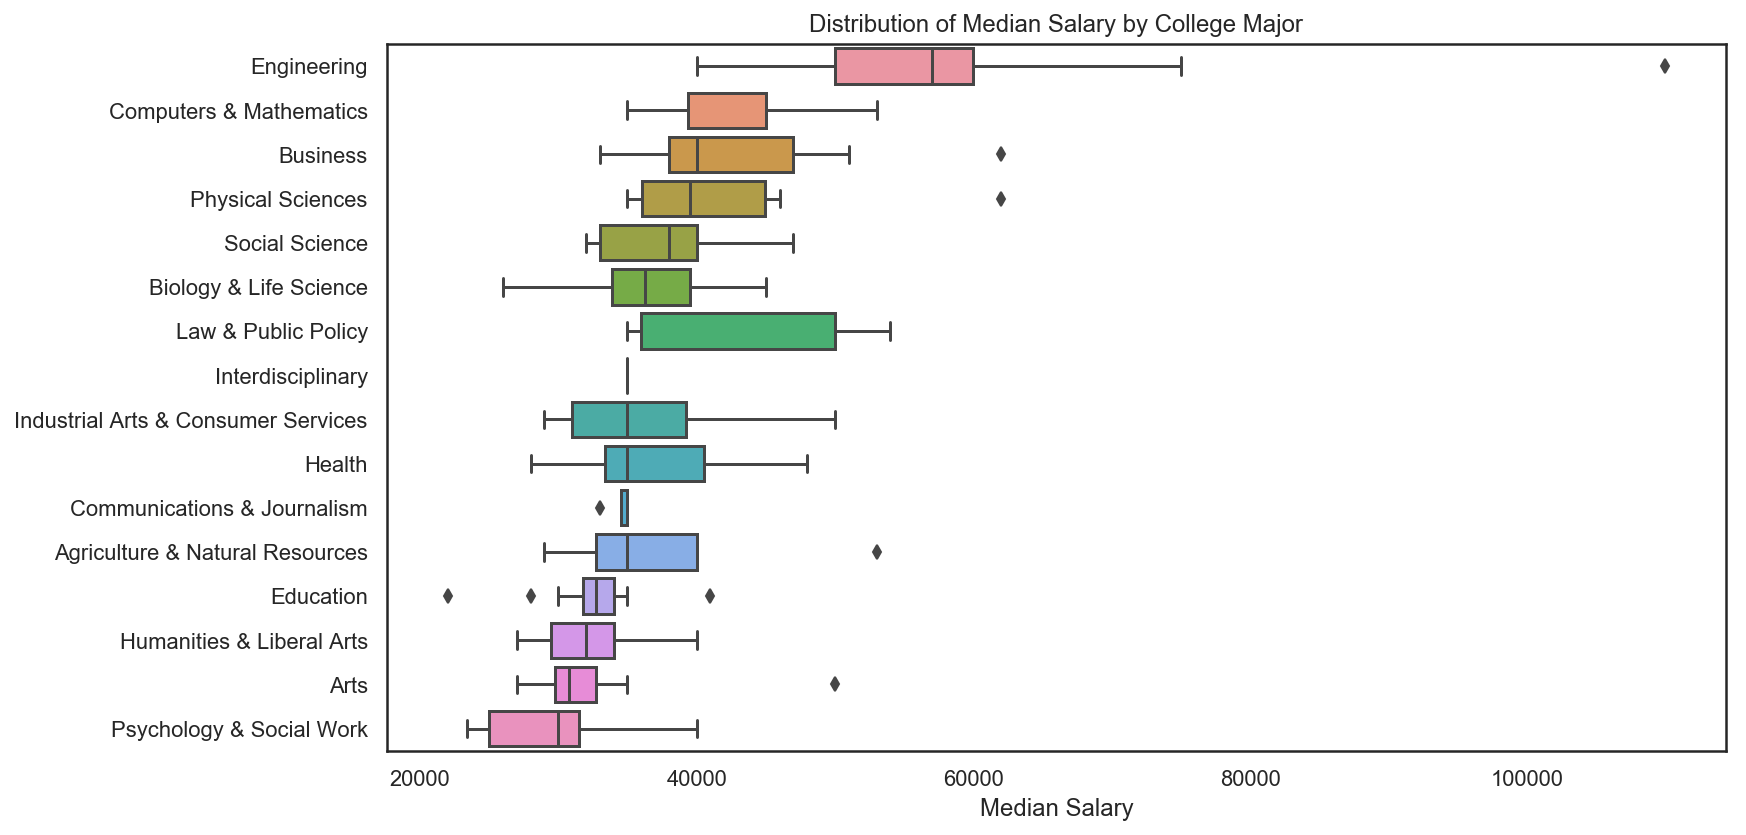

In [103]:
order = df.groupby('Major_category')['Median'].median().sort_values(ascending=False).index
ax = sns.boxplot(x='Median', y='Major_category', data=df, order=order)
ax.set_title("Distribution of Median Salary by College Major")
ax.set_xlabel("Median Salary")
ax.set_ylabel("");

### Matplotlib and Pandas

The default boxplot from pandas isn't as useful since it doesn't attempt to order on the values at all. Instead, we get a boxplot with the arrangement of boxes based on the lexicographical ordering of the major categories.

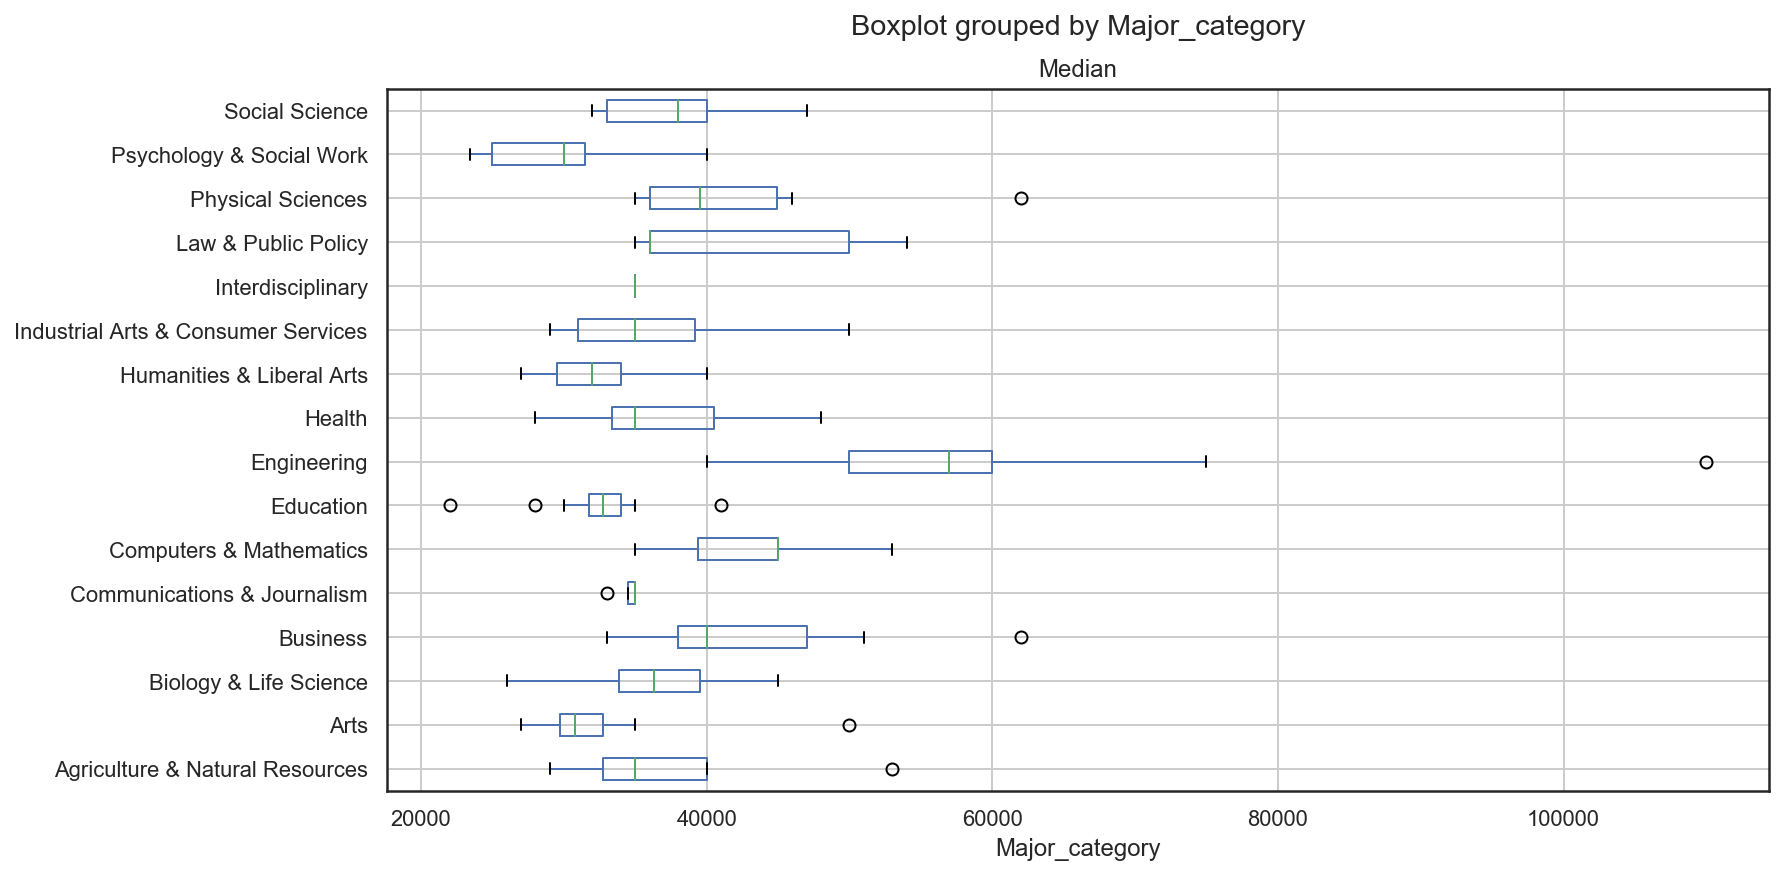

In [104]:
df.boxplot(by='Major_category', column=['Median'], vert=False);

Unfortunately, matplotlib do not give us an `order` parameter as the Seaborn library does, so getting the ordering right with the pandas plotting interface is a bit more involved. 

Again, we find the ordering by grouping by major category and sorting the calculated median of the median salaries. Additionally, we also need to create a new `DataFrame` with a column for each major category. By default, if we call the `boxplot` method on a pandas `DataFrame`, we will get a graph with a box for each column and with the order of those boxes specified by the order of the columns. Therefore, if we create a new `DataFrame` with a column for each category, we can use our ordered list of categories to sort the columns in our new `DataFrame` according to the median value of median salaries, which will result in a boxplot order that matches the one seen in David's video.

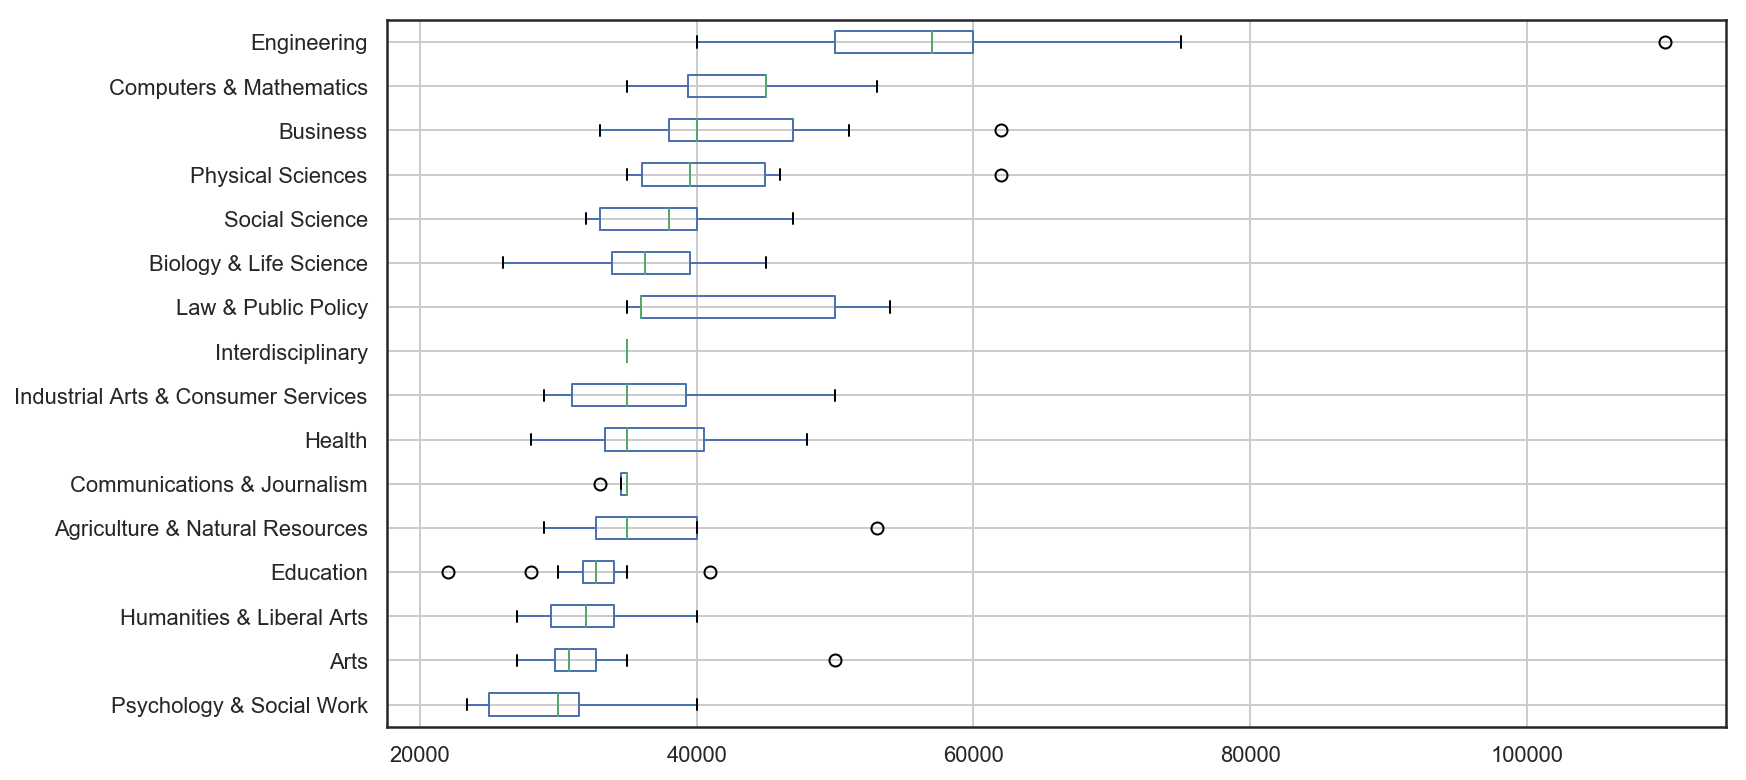

In [123]:
grouped = df.groupby('Major_category')
order = grouped['Median'].median().sort_values().index
df2 = pd.DataFrame({col:vals['Median'] for col,vals in grouped})
df2[order].boxplot(vert=False);